# **Exploratory Data Analysis - Supply Chain**

## Company - **DataCo Global**

## Data - *https://drive.google.com/file/d/1pdzqVQWOs7KTRZbraTTQJxk8d5tZbhki/view*

### **Installing & Importing Libraries**

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install cartopy
!pip install folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import combinations
sns.set()
import folium
from folium.plugins import HeatMap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.9 MB/s eta 0:00:00


### **Reading Data from CSV file to Pandas DataFrame**

In [ ]:
data_link = 'https://drive.google.com/file/d/1pdzqVQWOs7KTRZbraTTQJxk8d5tZbhki/view'
df = pd.read_csv(f'https://drive.google.com/uc?id={data_link.split("/")[-2]}',encoding='latin1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### **Data Preprocessing**

#### **Shape of the Dataset**

In [ ]:
df.shape

(180519, 53)

#### **Number of missing values in each column**

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

Product Description column is all empty 180519 row i.e., all rows have missing values. So dropping that column.

In [ ]:
df = df.drop('Product Description',axis=1)

#### **Finding Number of Unique values in each column**

In [ ]:
df.nunique()

In [ ]:
df.nunique()[df.nunique() < 10]

Type                             4
Days for shipping (real)         7
Days for shipment (scheduled)    4
Delivery Status                  4
Late_delivery_risk               2
Customer Country                 2
Customer Email                   1
Customer Password                1
Customer Segment                 3
Market                           5
Order Item Quantity              5
Order Status                     9
Product Status                   1
Shipping Mode                    4
dtype: int64

In [ ]:
df.nunique()[df.nunique() == df.shape[0]]

Order Item Id    180519
dtype: int64

We see Customer Email, Customer Password and Product Status has only 1 unique value i.e., they are not going to give any insights so dropping them.

And if we observe there are 180519 unique Order Item Id i.e., 1 unique value for each row, so making it as index of the dataframe

In [ ]:
df['Customer Email'].unique()

array(['XXXXXXXXX'], dtype=object)

In [ ]:
df['Customer Password'].unique()

array(['XXXXXXXXX'], dtype=object)

In [ ]:
df['Product Status'].unique()

array([0])

In [ ]:
df = df.drop(['Customer Email','Customer Password','Product Status'], axis=1)

In [ ]:
df.set_index('Order Item Id', inplace = True)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
Order Item Id,,,,,,,,,,,,,,,,,,,,,
180517,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,2/3/2018 22:56,Standard Class
179254,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/18/2018 12:27,Standard Class
179253,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/17/2018 12:06,Standard Class
179252,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/16/2018 11:45,Standard Class
179251,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/15/2018 11:24,Standard Class


#### **Identifying Duplicate Columns**

In [ ]:
duplicates = []
for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        if df.iloc[:, i].equals(df.iloc[:, j]):
            duplicates.append((df.columns[i], df.columns[j]))

print(duplicates)

[('Benefit per order', 'Order Profit Per Order'), ('Sales per customer', 'Order Item Total'), ('Category Id', 'Product Category Id'), ('Customer Id', 'Order Customer Id'), ('Order Item Cardprod Id', 'Product Card Id'), ('Order Item Product Price', 'Product Price')]


We found,
1. **Benefit per order** and **Order Profit Per Order** having same values, so dropping **Order Profit Per Order**
2. **Sales per customer** and **Order Item Total** having same values, so dropping **Order Item Total**
3. **Category Id** and **Product Category Id** having same values, so dropping **Product Category Id**
4. **Customer Id** and **Order Customer Id** having same values, so dropping **Order Customer Id**
5. **Product Card Id** and **Order Item Cardprod Id** having same values, so dropping **Order Item Cardprod Id**
6. **Product Price** and **Order Item Product Price** having same values, so dropping **Order Item Product Price**


In [ ]:
df = df.drop(['Order Profit Per Order', 'Order Item Total', 'Product Category Id', 'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Product Price'], axis=1)

### **Data Visualization**

#### **Univariate Analysis**

Pie chart:-
1. Delivery Status grouped by Order Id
2. Customer Segment grouped by Customer Id
3. Shipping Mode grouped by Order Id
4. Type(Order Type) grouped by Order Id
5. Market(Market Type) grouped by Order Id


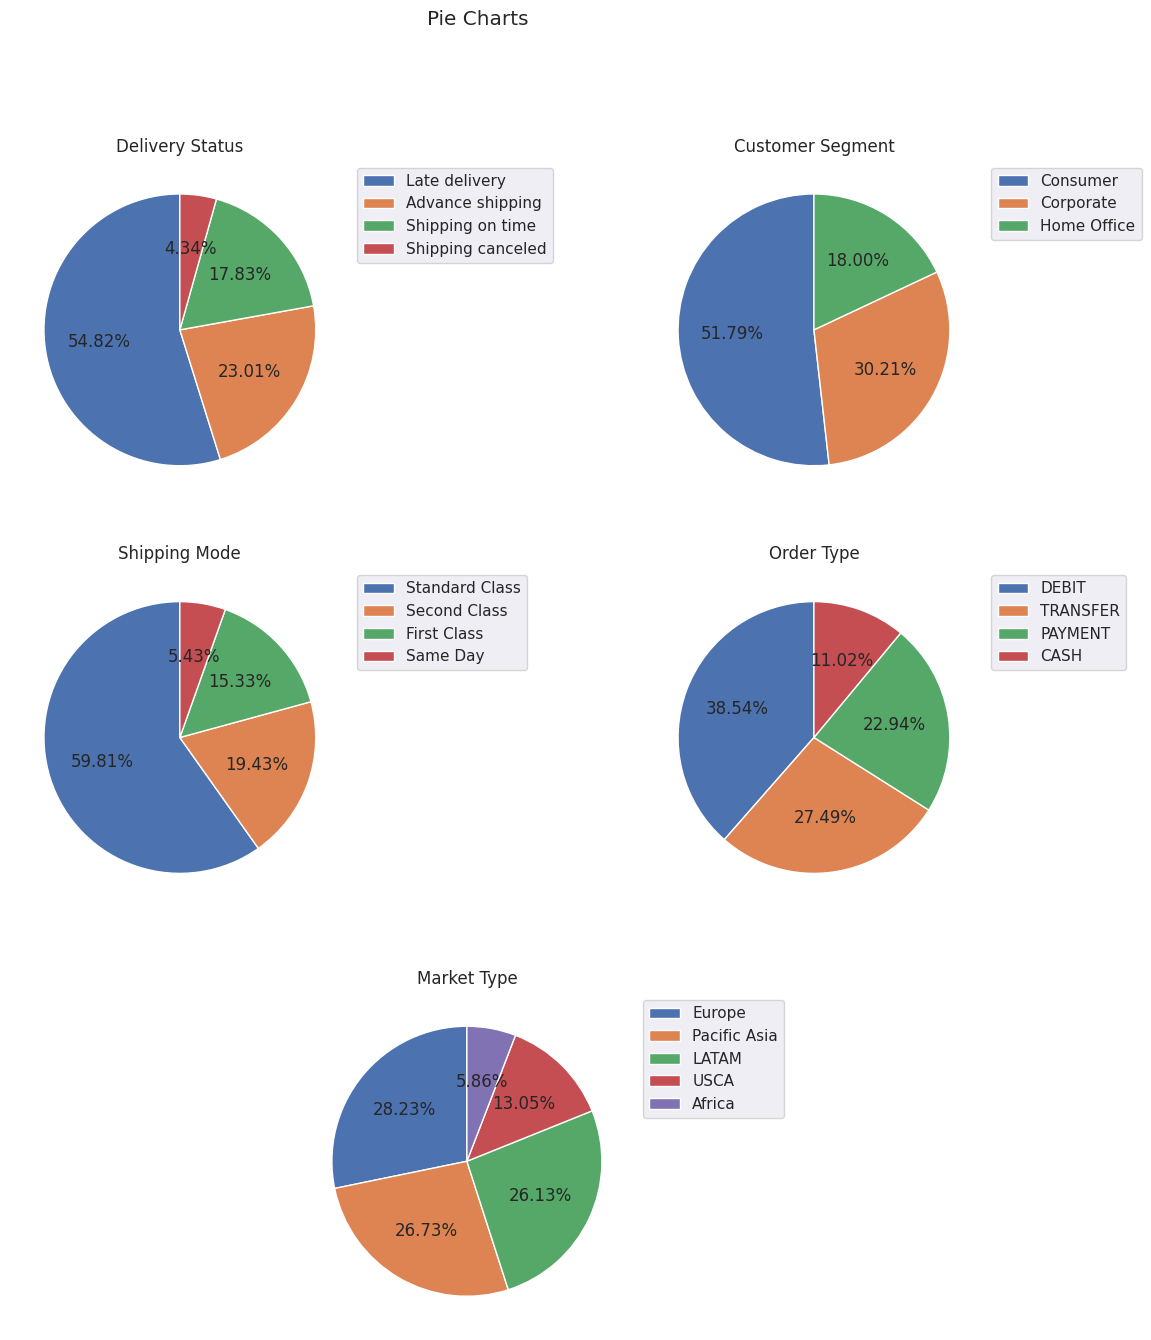

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,15))

axes[2][1].set_visible(False)
axes[2][0].set_position([0.38,0.1,0.225,0.225])

plt.suptitle('Pie Charts')

def pie_charts(col, grp_by_col, agg, ax, title):
  col_df = df.groupby(grp_by_col)[col].agg(agg).value_counts()
  ax.pie(col_df, autopct='%1.2f%%', startangle=90)
  ax.set_title(title)
  ax.legend(labels=col_df.index, loc='upper left', bbox_to_anchor=(1,1))

pie_charts('Delivery Status', 'Order Id', 'max', axes[0,0], 'Delivery Status')
pie_charts('Customer Segment', 'Customer Id', 'max', axes[0,1], 'Customer Segment')
pie_charts('Shipping Mode', 'Order Id', 'max', axes[1,0], 'Shipping Mode')
pie_charts('Type', 'Order Id', 'max', axes[1,1], 'Order Type')
pie_charts('Market', 'Order Id', 'max', axes[2,0], 'Market Type')
plt.show()

**54.82%** of all orders were **delivered late**.

Customer Segment -> **51.79%** are **Consumers**, **30.21%** are **Corporates**, **18%** are **Home Offices**

**59.81%** people prefer **Standard Class** for shipping mode.

Around **65%** of Orders are of type **Debit** or **Transfer**

In **Markets** ->  *Europe*, *Pacific Asia* and *LATAM* (Latin America) have almost equal share of around **26% to 28% each**

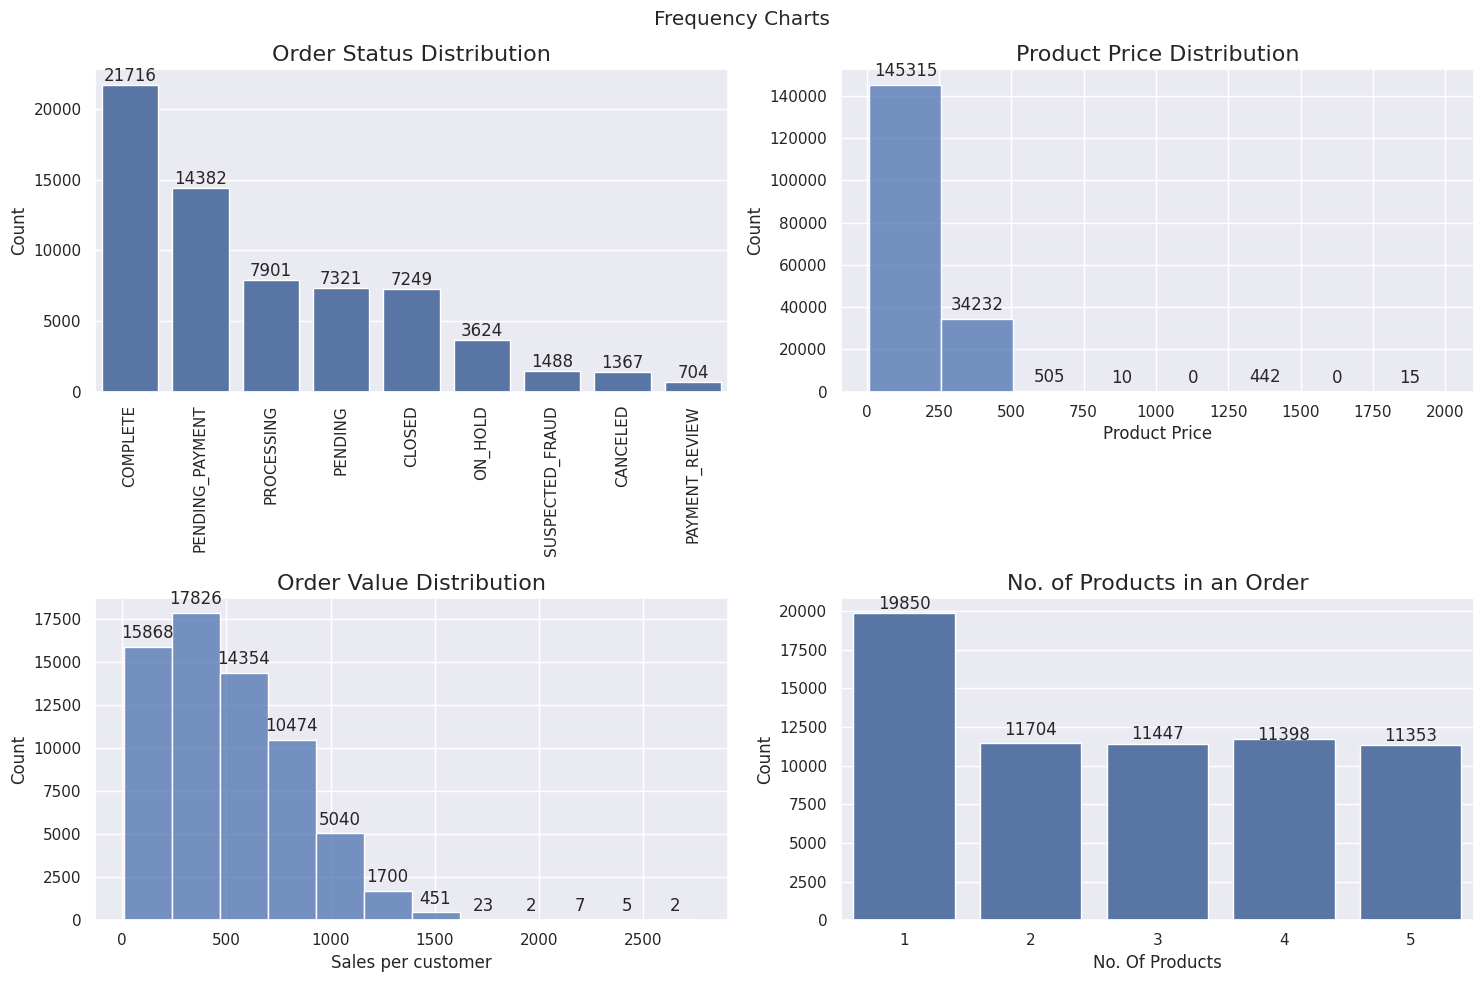

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.suptitle('Frequency Charts')

col_df = df.groupby('Order Id')['Order Status'].agg('max').value_counts()

sns.barplot(x=col_df.index, y=col_df.values, ax=axes[0,0])

for i, v in enumerate(col_df.values):
    axes[0,0].text(i, v + 0.1, str(v), ha='center', va='bottom')

axes[0,0].set_title('Order Status Distribution', fontsize=16)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=90)

sns.histplot(df['Product Price'], bins=8, ax=axes[0,1])

for p in axes[0,1].patches:
    axes[0,1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

axes[0,1].set_title('Product Price Distribution', fontsize=16)

sns.histplot(df.groupby('Order Id')['Sales per customer'].agg('sum'), bins=12, ax=axes[1,0])

for p in axes[1,0].patches:
    axes[1,0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

axes[1,0].set_title('Order Value Distribution', fontsize=16)

col_df = df.groupby('Order Id')['Order Id'].agg('count').value_counts()

sns.barplot(x=col_df.index, y=col_df.values, ax=axes[1,1])

for i, v in enumerate(col_df.values):
    axes[1,1].text(i, v + 0.1, str(v), ha='center', va='bottom')

axes[1,1].set_title('No. of Products in an Order', fontsize=16)
axes[1,1].set_xlabel('No. Of Products')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x')

plt.tight_layout()
plt.show()

Most order status is Complete.
Most products price lie between 0 to 250.
Maximum number of products in an order is 1.

#### **Bivariate Analysis**

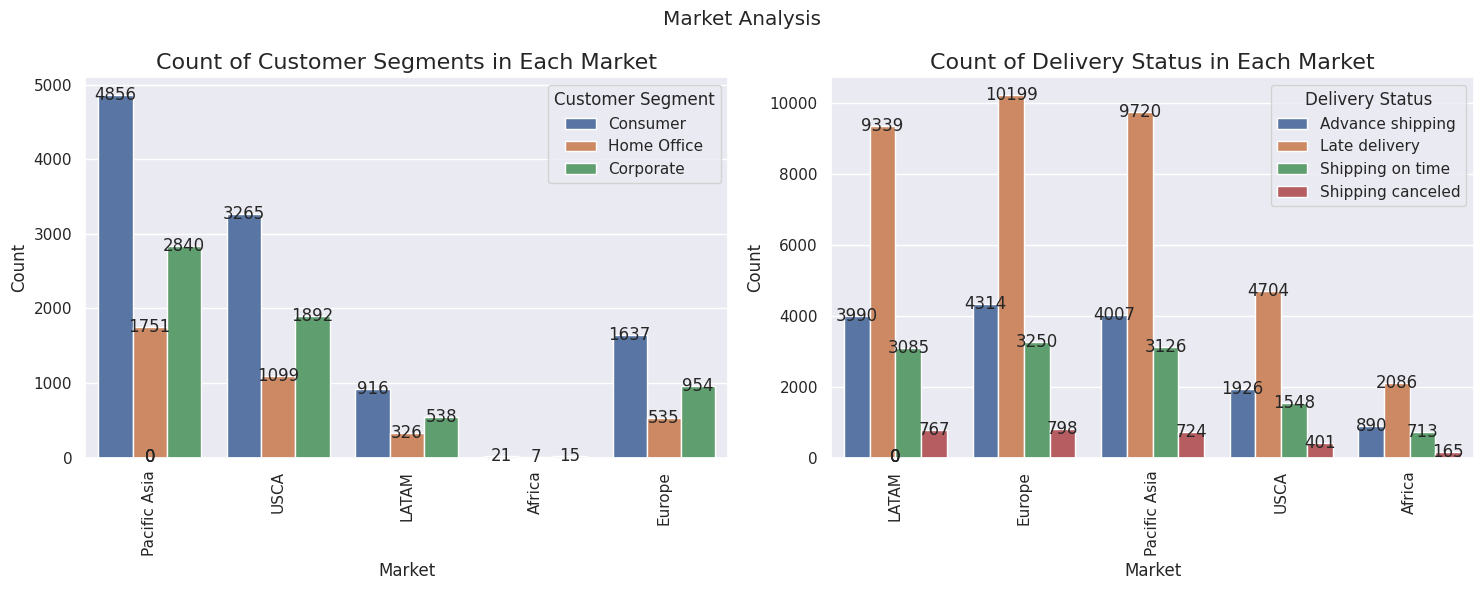

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.suptitle('Market Analysis')

sns.countplot(x='Market', hue='Customer Segment', data=df.groupby('Customer Id')[['Market','Customer Segment']].agg('max'), ax=axes[0])
axes[0].set_title('Count of Customer Segments in Each Market', fontsize=16)
axes[0].set_xlabel('Market')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

sns.countplot(x='Market', hue='Delivery Status', data=df.groupby('Order Id')[['Market','Delivery Status']].agg('max'), ax=axes[1])
axes[1].set_title('Count of Delivery Status in Each Market', fontsize=16)
axes[1].set_xlabel('Market')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.tight_layout()
plt.show()

Despite only 43 unique customers from Africa, a significant total of 3705 orders have been placed.

#### Most Countries Ordering

In [ ]:
unique_pairs_rounded = df[['Longitude', 'Latitude']].drop_duplicates()
locations = unique_pairs_rounded[['Latitude', 'Longitude']].values

m = folium.Map(location=[0,0], zoom_start=2, control_scale=True, scrollWheelZoom=False)

HeatMap(locations).add_to(m)
m

The analysis reveals that the majority of orders originate from the United States, indicating a significant portion of the company's customer base resides in this region.

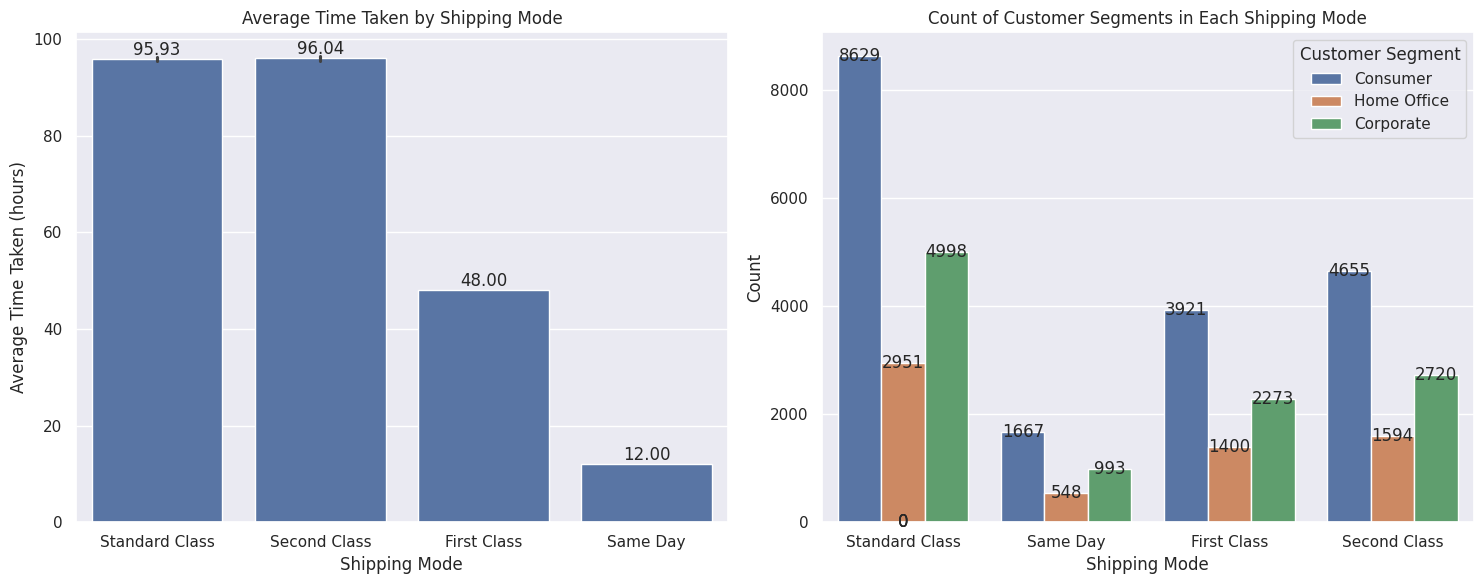

In [ ]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['time_taken_hours'] = (df['shipping date (DateOrders)'] - df['order date (DateOrders)']).dt.total_seconds() / 3600

avg_time_by_order_id_shipping_mode = df.groupby(['Order Id', 'Shipping Mode'])['time_taken_hours'].mean().reset_index()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Shipping Mode', y='time_taken_hours', data=avg_time_by_order_id_shipping_mode)
plt.title('Average Time Taken by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Time Taken (hours)')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.subplot(1, 2, 2)
countplot = sns.countplot(x='Shipping Mode', hue='Customer Segment', data=df.groupby(['Customer Id', 'Shipping Mode'])['Customer Segment'].agg('max').reset_index())
plt.title('Count of Customer Segments in Each Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')

for p in countplot.patches:
    countplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.tight_layout()
plt.show()

Despite only 43 unique customers from Africa, a significant total of 3705 orders have been placed.

Text(0.5, 1.0, 'Sales per Order by Category Name')

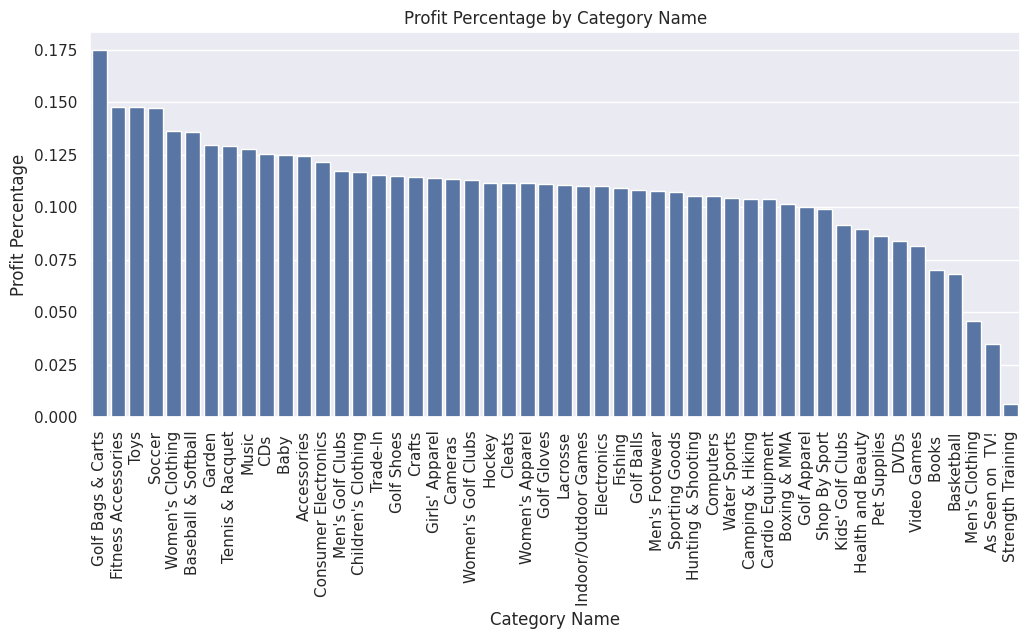

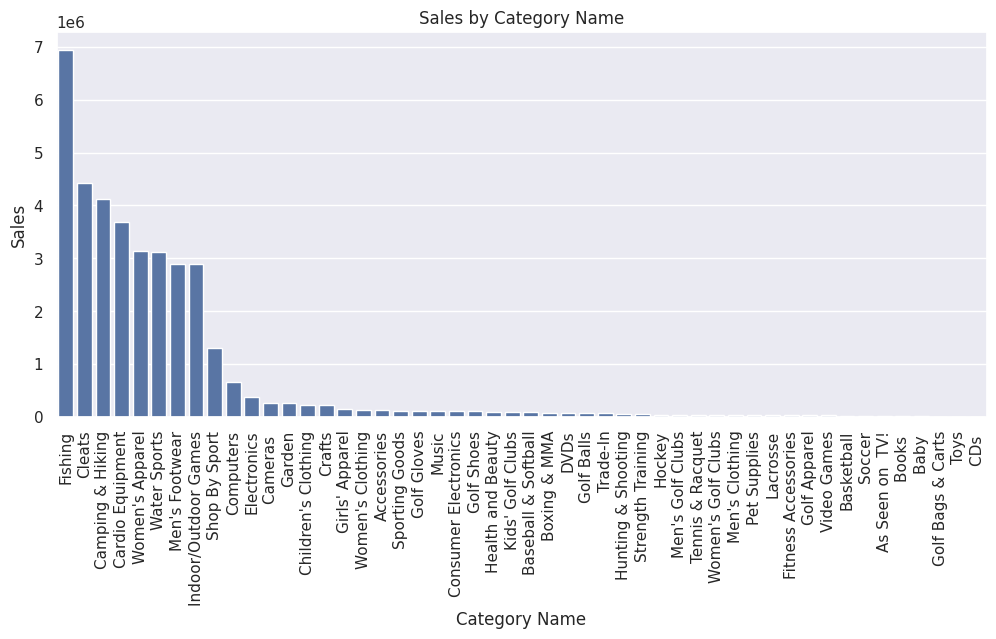

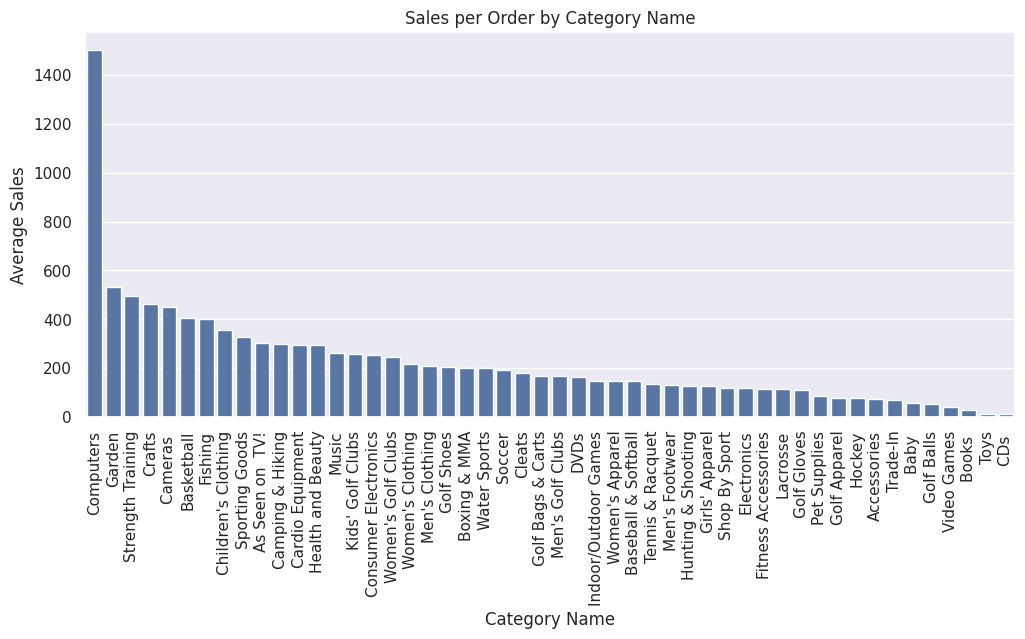

In [ ]:
def calculate_category_metrics(df, column):
    category_sales_count = df.groupby(column)["Sales"].count().reset_index()
    category_sales_count.columns = [column, "Sales Count"]
    category_sales_metrics = df.groupby(column)[["Sales", "Benefit per order", "Order Item Discount"]].sum().reset_index()
    category_metrics = pd.merge(category_sales_count, category_sales_metrics, on=column)
    category_metrics["Average Sales"] = category_metrics["Sales"] / category_metrics["Sales Count"]
    category_metrics["Profit Percentage"] = category_metrics["Benefit per order"] / category_metrics["Sales"]
    return category_metrics

category_metrics = calculate_category_metrics(df, "Category Name")

plt.figure(figsize=(12, 5))
sns.barplot(data=category_metrics.sort_values(by="Profit Percentage", ascending=False),
            x="Category Name", y="Profit Percentage")
plt.xticks(rotation=90)
plt.title('Profit Percentage by Category Name')

plt.figure(figsize=(12, 5))
sns.barplot(data=category_metrics.sort_values(by="Sales", ascending=False),
            x="Category Name", y="Sales")
plt.xticks(rotation=90)
plt.title('Sales by Category Name')

plt.figure(figsize=(12, 5))
sns.barplot(data=category_metrics.sort_values(by="Average Sales", ascending=False),
            x="Category Name", y="Average Sales")
plt.xticks(rotation=90)
plt.title('Sales per Order by Category Name')

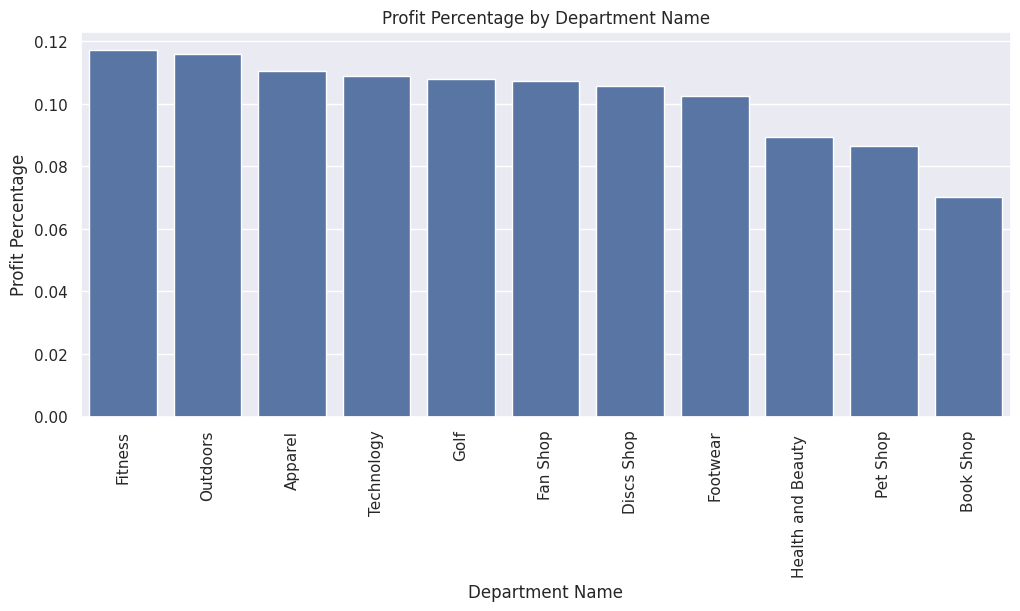

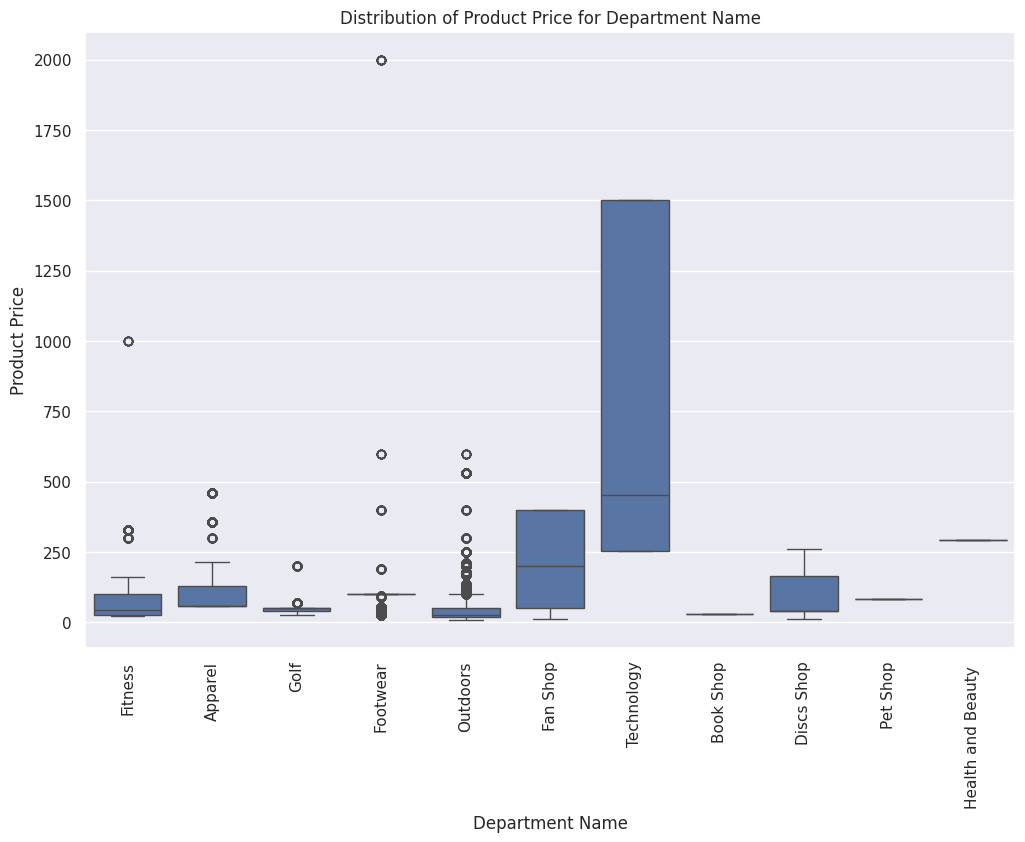

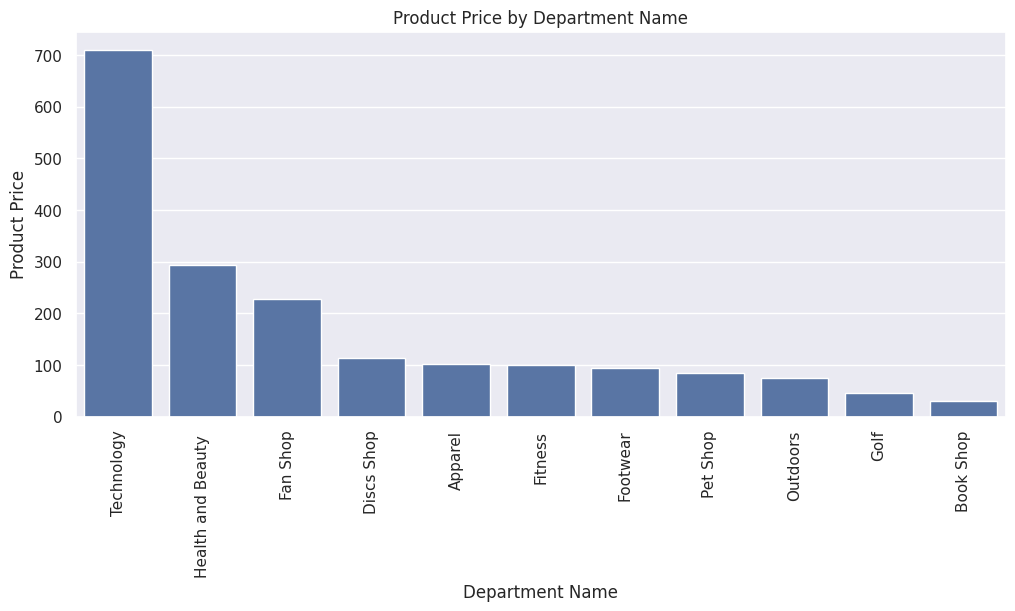

In [ ]:

def calculate_department_metrics(df, column):
    department_sales_count = df.groupby(column)["Sales"].count().reset_index()
    department_sales_count.columns = [column, "Sales Count"]
    department_sales_metrics = df.groupby(column)[["Sales", "Benefit per order", "Order Item Discount"]].sum().reset_index()
    department_metrics = pd.merge(department_sales_count, department_sales_metrics, on=column)
    department_metrics["Profit Percentage"] = department_metrics["Benefit per order"] / department_metrics["Sales"]
    return department_metrics

department_metrics = calculate_department_metrics(df, "Department Name")

plt.figure(figsize=(12, 5))
sns.barplot(data=department_metrics.sort_values(by="Profit Percentage", ascending=False),
            x="Department Name", y="Profit Percentage")
plt.xticks(rotation=90)
plt.title('Profit Percentage by Department Name')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Department Name", y="Product Price")
plt.xticks(rotation=90)
plt.title('Distribution of Product Price for Department Name')

plt.figure(figsize=(12, 5))
sns.barplot(data=df.groupby("Department Name")["Product Price"].mean().reset_index().sort_values(by="Product Price", ascending=False),
            x="Department Name", y="Product Price")
plt.xticks(rotation=90)
plt.title('Product Price by Department Name')

plt.show()


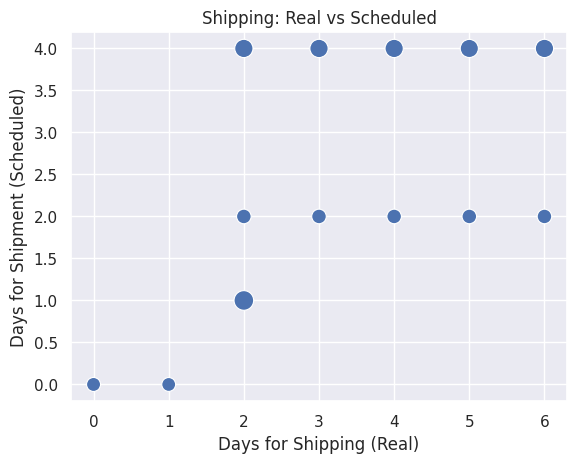

In [ ]:
# Shipping for real vs scheduled
temp = df.groupby(["Days for shipping (real)", "Days for shipment (scheduled)"]).size().reset_index()
temp["Size"] = temp[0] / temp[0].sum() * 500
sns.scatterplot(data=temp, x="Days for shipping (real)", y="Days for shipment (scheduled)", size="Size", sizes=(100, 200), legend=False)
plt.title('Shipping: Real vs Scheduled')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Days for Shipment (Scheduled)')
plt.show()

In [ ]:
shipping_delivery_pivot = pd.crosstab(df["Shipping Mode"], df["Delivery Status"], normalize="index") * 100
print("Shipping Mode vs Delivery Status Pivot Table:")
shipping_delivery_pivot

Shipping Mode vs Delivery Status Pivot Table:


Delivery Status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
Shipping Mode,,,,
First Class,0.000000,95.322499,4.677501,0.000000
Same Day,0.000000,45.743042,4.559926,49.697032
Second Class,0.000000,76.632781,4.003862,19.363358
Standard Class,38.599748,38.071683,4.268134,19.060435


#### Top 10 Profitable Categories and Departments

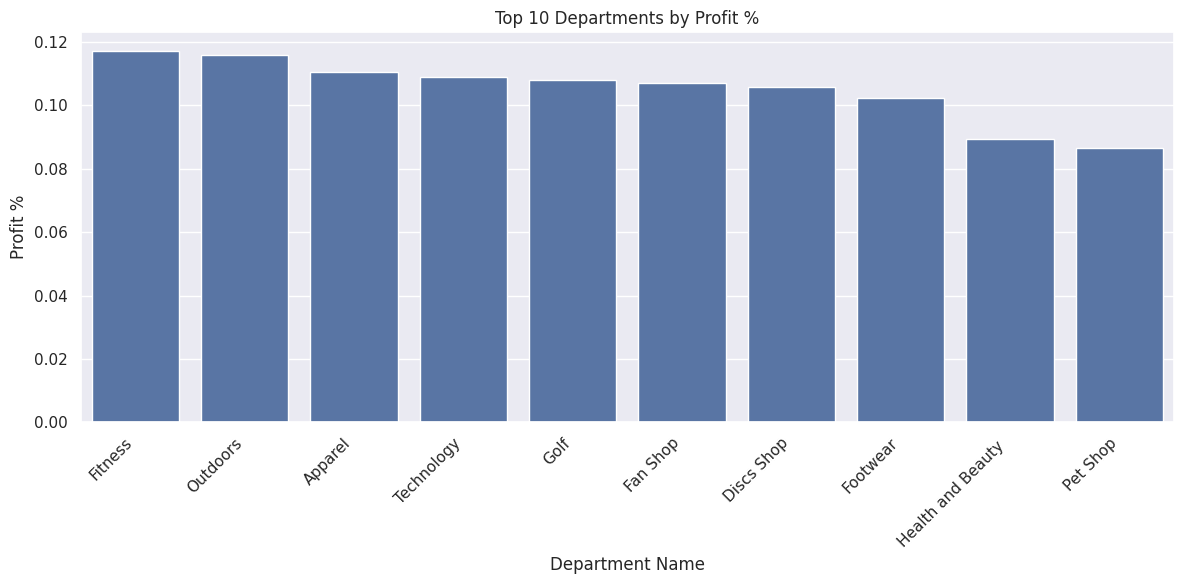

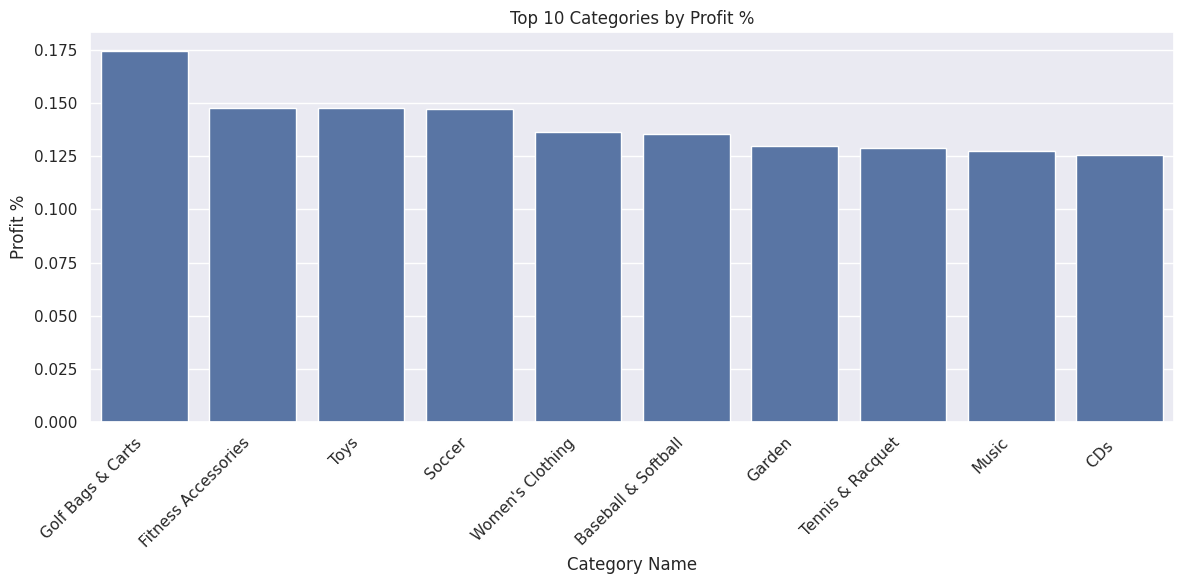

In [ ]:
top_10_departments = department_metrics.sort_values(by="Profit Percentage", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_departments, x="Department Name", y="Profit Percentage")
plt.title('Top 10 Departments by Profit %')
plt.xlabel('Department Name')
plt.ylabel('Profit %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_10_categories = category_metrics.sort_values(by="Profit Percentage", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_categories, x="Category Name", y="Profit Percentage")
plt.title('Top 10 Categories by Profit %')
plt.xlabel('Category Name')
plt.ylabel('Profit %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

INSIGHT
The analysis identifies "Golf Bags and Carts" as the most profitable category and the "Fitness" department as the most profitable overall.


#### **Multivariate Analysis**

<Axes: title={'center': 'Heatmap - Plot of Correlations'}>

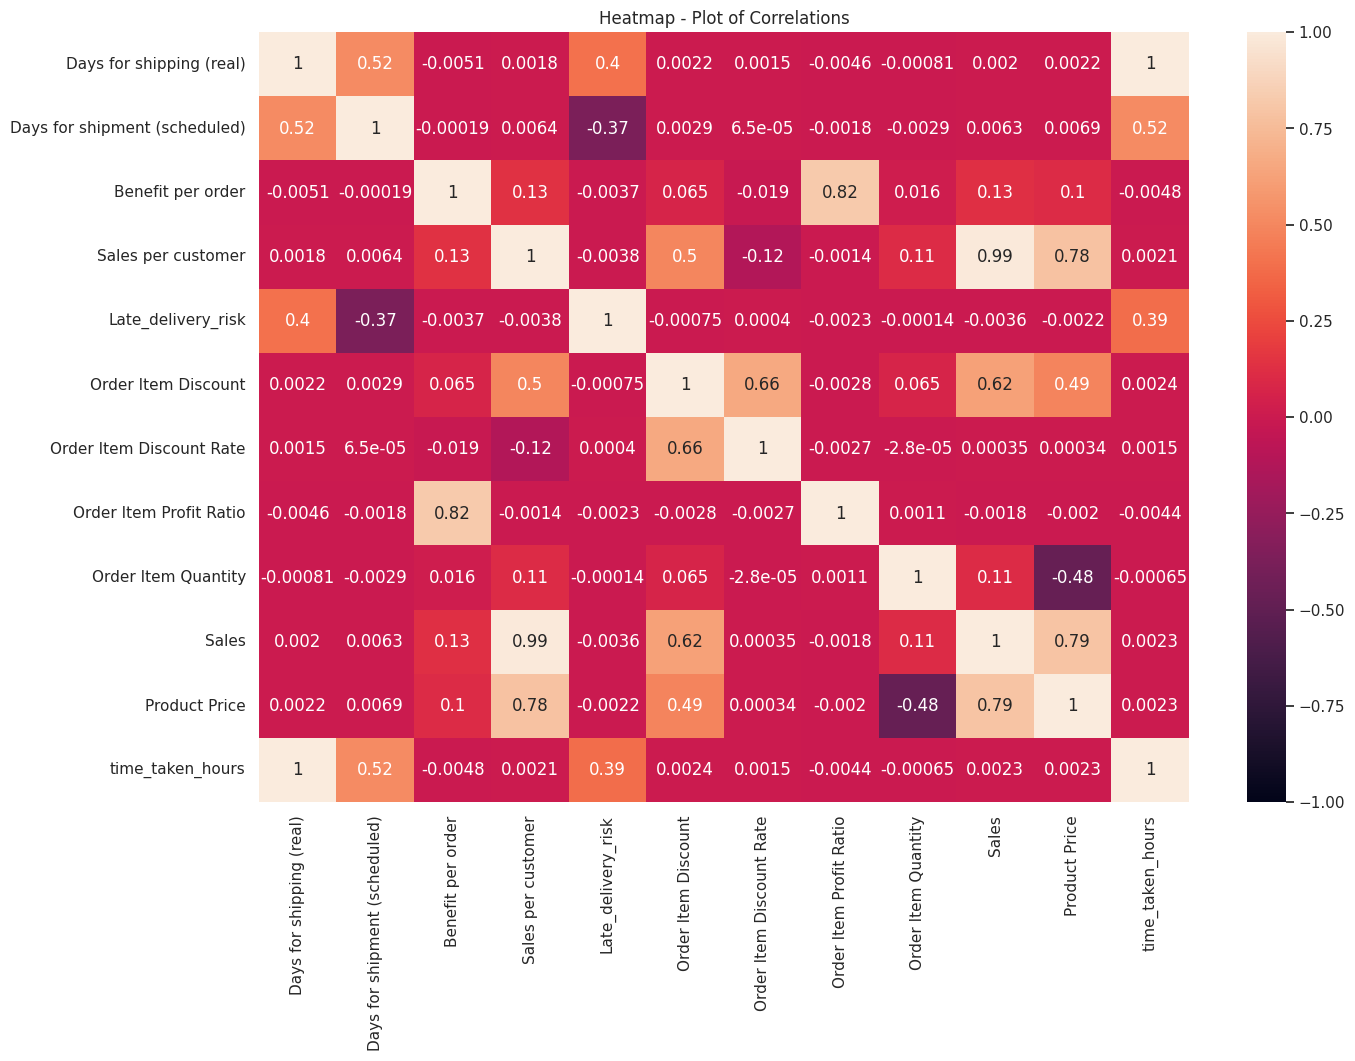

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title("Heatmap - Plot of Correlations")
sns.heatmap(df.drop(['Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Id', 'Order Zipcode', 'Product Card Id'], axis=1).corr(numeric_only=True), vmin=-1, vmax=1, annot=True, ax=ax)

Strong Correlation between:-
Sales per customer and Sales
Days for shipping (real) and Days for shipment(scheduled)
Order Item Profit Ratio vs Benefit per order
Sales per customer vs Product Price
Sales vs Order Item Discount
Order Item Qunatity vs Order Item Discount
Order Item Discount vs sales oer customer
Benefit per order vs Order Item Profit Ratio


In [ ]:
df[df['Delivery Status'] == 'Shipping canceled']['Department Name'].value_counts()

Fan Shop              2828
Apparel               2114
Golf                  1452
Footwear               634
Outdoors               419
Fitness                105
Discs Shop              83
Technology              69
Pet Shop                20
Health and Beauty       16
Book Shop               14
Name: Department Name, dtype: int64

In [ ]:
df[df['Department Name'] == 'Fan Shop']

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,time_taken_hours
Order Item Id,,,,,,,,,,,,,,,,,,,,,
141192,TRANSFER,4,4,34.849998,124.459999,Shipping on time,0,44,Hunting & Shooting,Caguas,...,Isla de la Juventud,PENDING,NaN,977,http://images.acmesports.sports/ENO+Atlas+Hamm...,ENO Atlas Hammock Straps,29.990000,2017-04-07 23:53:00,Standard Class,96.0
115235,DEBIT,4,2,0.000000,296.980011,Late delivery,1,43,Camping & Hiking,Caguas,...,Ash Sharqiyah,ON_HOLD,NaN,957,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,2016-11-07 21:49:00,Second Class,96.0
103115,DEBIT,5,2,95.540001,293.980011,Late delivery,1,43,Camping & Hiking,Caguas,...,Garb-Chrarda-Beni Hsen,ON_HOLD,NaN,957,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,2016-08-30 22:16:00,Second Class,120.0
104311,DEBIT,2,4,53.980000,119.959999,Advance shipping,0,44,Hunting & Shooting,Cumberland,...,Gran Casablanca,COMPLETE,NaN,977,http://images.acmesports.sports/ENO+Atlas+Hamm...,ENO Atlas Hammock Straps,29.990000,2016-09-03 23:08:00,Standard Class,48.0
125852,PAYMENT,5,4,-47.430000,290.980011,Late delivery,1,43,Camping & Hiking,Caguas,...,Lagos,PENDING_PAYMENT,NaN,957,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,2017-01-10 04:24:00,Standard Class,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65177,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghái,CLOSED,NaN,1004,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-20 03:40:00,Standard Class,96.0
65161,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,NaN,1004,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-19 01:34:00,Second Class,72.0
65129,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,NaN,1004,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-20 21:00:00,Standard Class,120.0


### Yearly Sales Distribution Across Departments

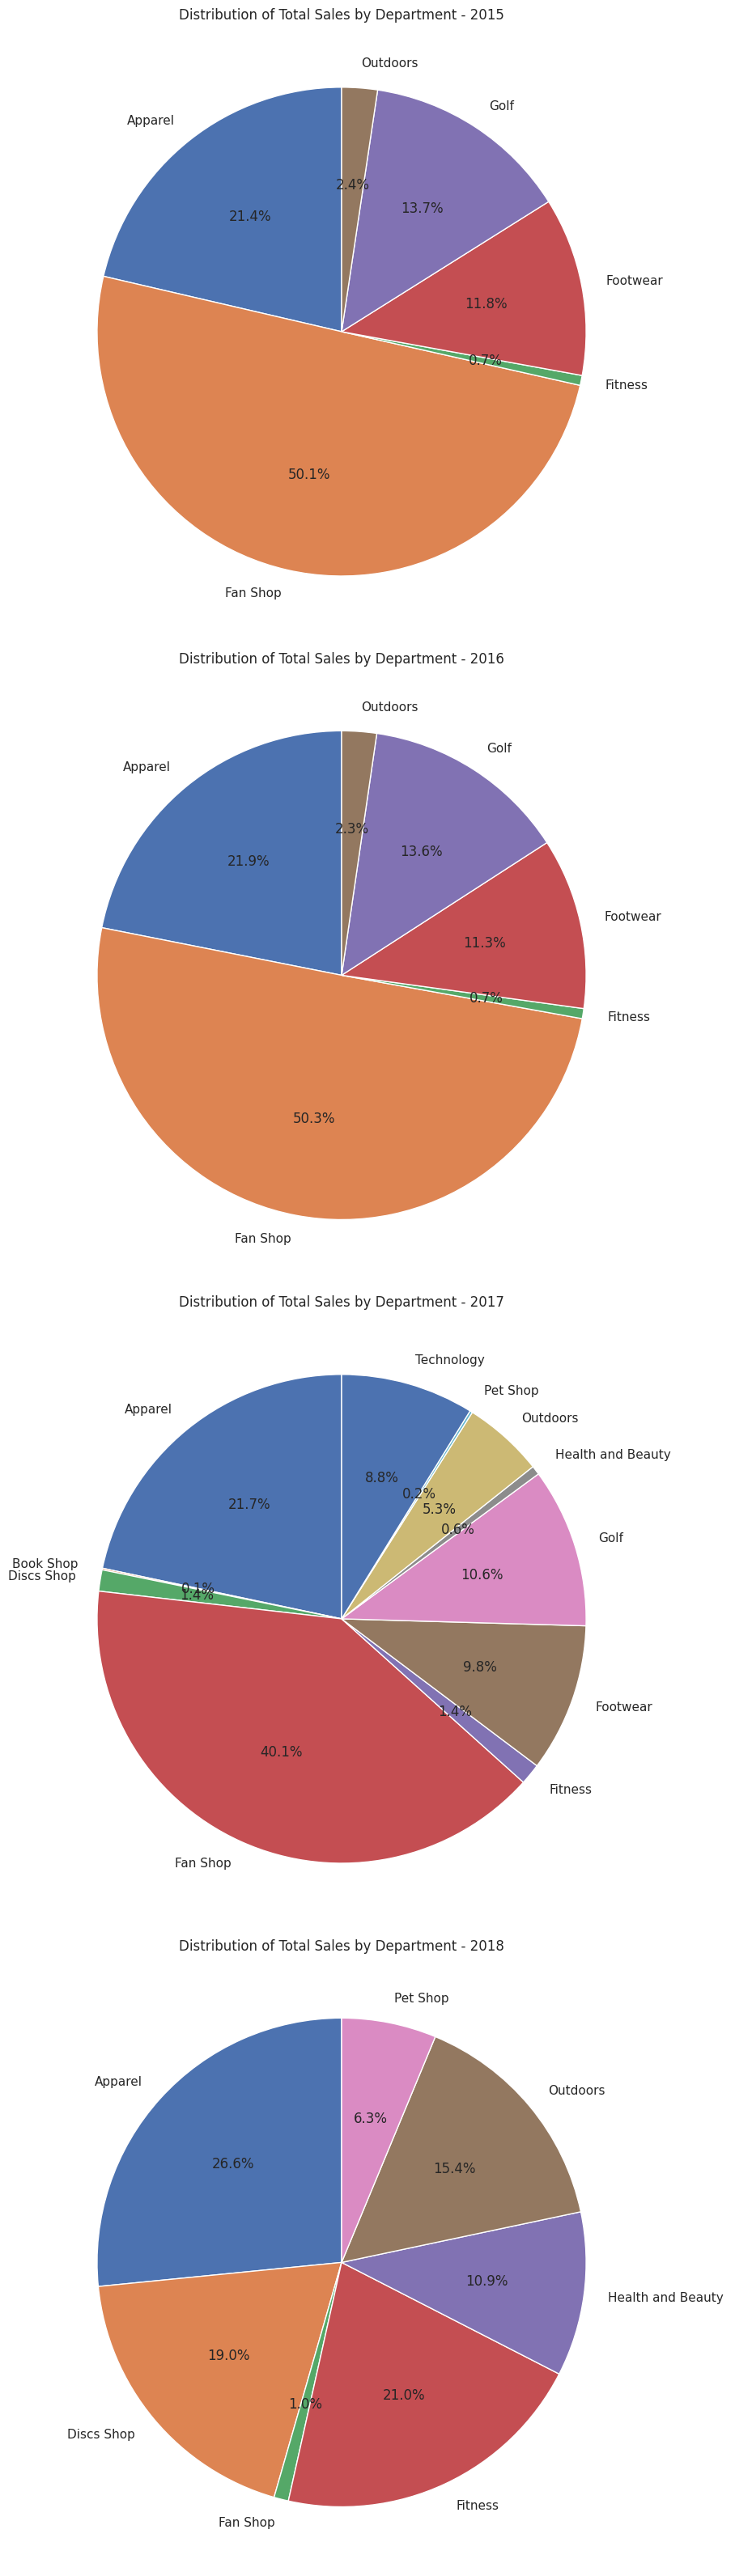

In [ ]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['order_year'] = df['order date (DateOrders)'].dt.year
unique_years = df['order_year'].unique()
num_years = len(unique_years)
unique_years.sort()
plt.figure(figsize=(16, 8 * num_years))
for i, year in enumerate(unique_years, 1):
    plt.subplot(num_years, 1, i)
    df_yearly = df[df['order_year'] == year]
    sales_by_department = df_yearly.groupby('Department Name')['Sales'].sum()
    plt.pie(sales_by_department, labels=sales_by_department.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of Total Sales by Department - {year}')

plt.tight_layout()
plt.show()

Emerging Revenue Sources from 2017:-
1. Pet Shop
2. Health and Beauty
3. Technology
4. Books Shop
5. Discs Shop

Constumer Insights:-
1. Pet Adoption Rising
2. Wellness Trend Surges
3. Digital Lifestyle Boom


### Fan Shop Department Sales Analysis

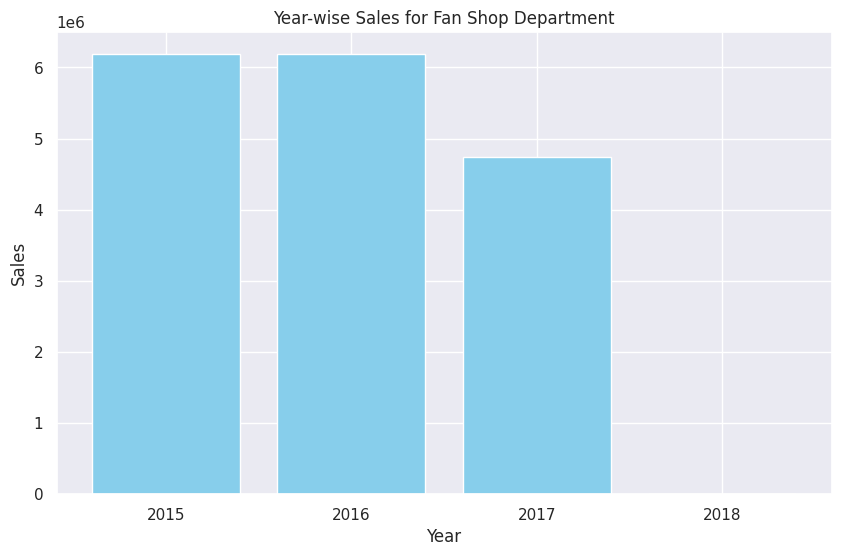

In [ ]:
sales_table = df.groupby(['order_year', 'Department Name'])['Sales'].sum().reset_index()
sales_table_pivot = sales_table.pivot(index='Department Name', columns='order_year', values='Sales')
fan_shop_data = sales_table[sales_table['Department Name'] == 'Fan Shop']
plt.figure(figsize=(10, 6))
plt.bar(fan_shop_data['order_year'], fan_shop_data['Sales'], color='skyblue')
plt.title('Year-wise Sales for Fan Shop Department')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(fan_shop_data['order_year'])
plt.show()

Fan Shop Decline: Fan Shop, while historically significant, has shown a decrease in contribution. Assess the reasons for this decline and consider strategies to rejuvenate interest, such as promotions or new product launches.

### Monthly Sales Comparison Over Years

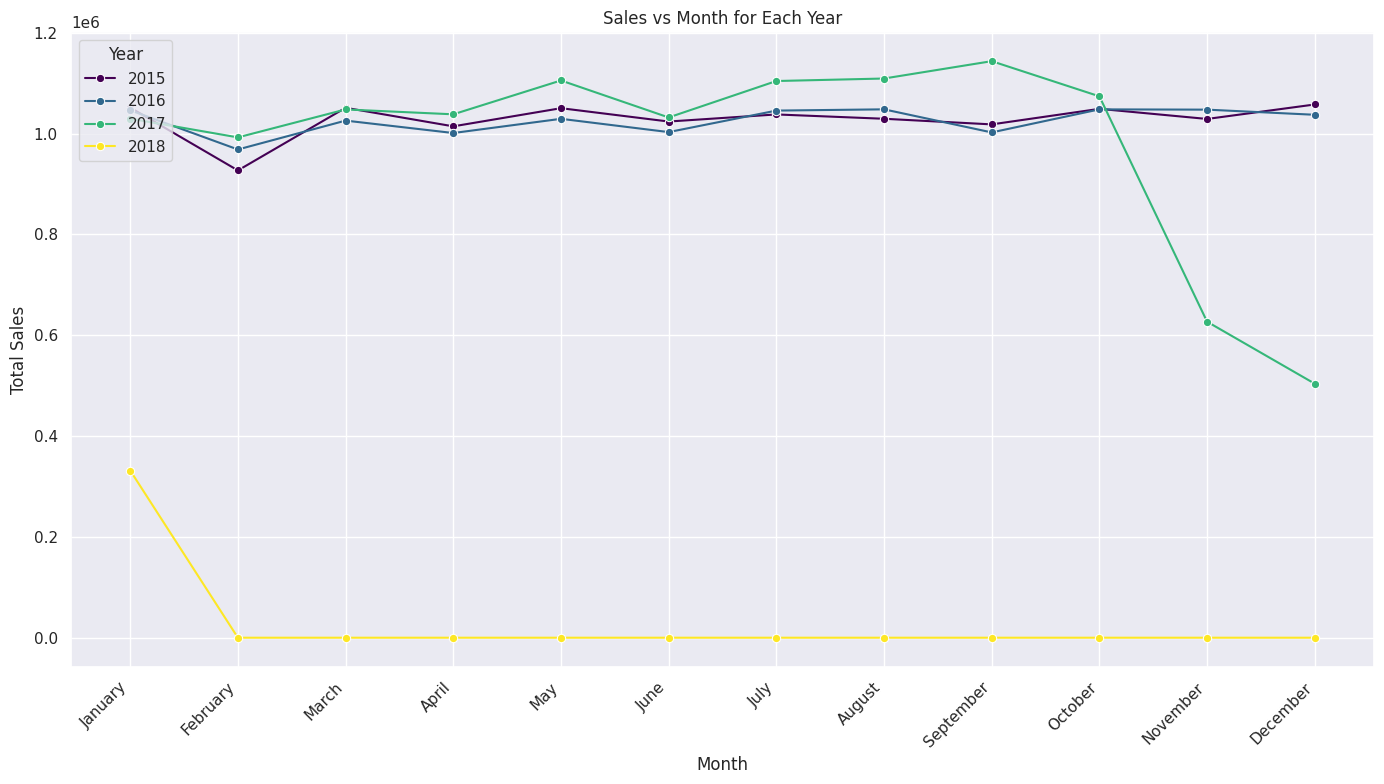

In [ ]:
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['order_month'] = pd.Categorical(df['order_month'], categories=month_order, ordered=True)
sales_by_month = df.groupby(['order_year', 'order_month'])['Sales'].sum().reset_index()
sales_by_month = sales_by_month.sort_values(['order_year', 'order_month'])
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_by_month, x='order_month', y='Sales', hue='order_year', marker='o', palette='viridis')
plt.title('Sales vs Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year', loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There has been a decline in sales Post October 2017

### Product Portfolio - Number of Products (SKUs) in Each Department

<ipython-input-33-8df667f3fb72>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Department Name', y='Number of Products', data=products_per_department, palette='viridis')


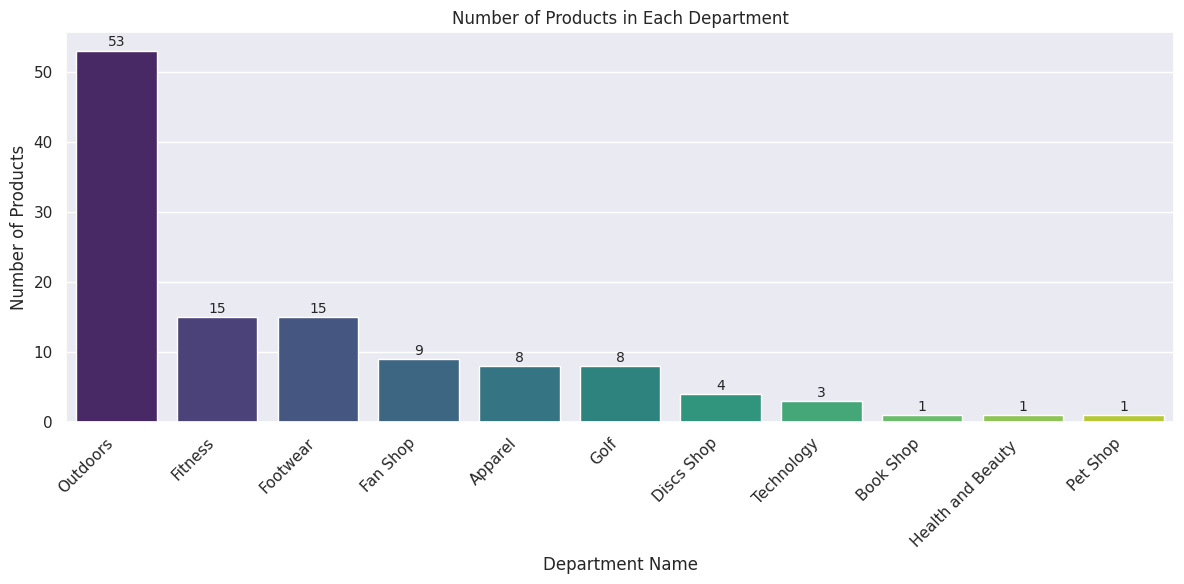

In [ ]:
products_per_department = df.groupby('Department Name')['Product Name'].nunique().reset_index(name='Number of Products')
products_per_department = products_per_department.sort_values(by='Number of Products', ascending=False)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Department Name', y='Number of Products', data=products_per_department, palette='viridis')

for index, value in enumerate(products_per_department['Number of Products']):
    bar_plot.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Number of Products in Each Department')
plt.xlabel('Department Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


SKU Distribution Disparity Across Departments:
1. Outdoors: 53 SKUs (High)

Emerging Departments:

1. Technology: 3 SKUs
2. Book Shop: 1 SKU
3. Health and Beauty: 1 SKU
4. Pet Shop: 1 SKU

Suggestion:- Increasing the sku's in emerging departments.

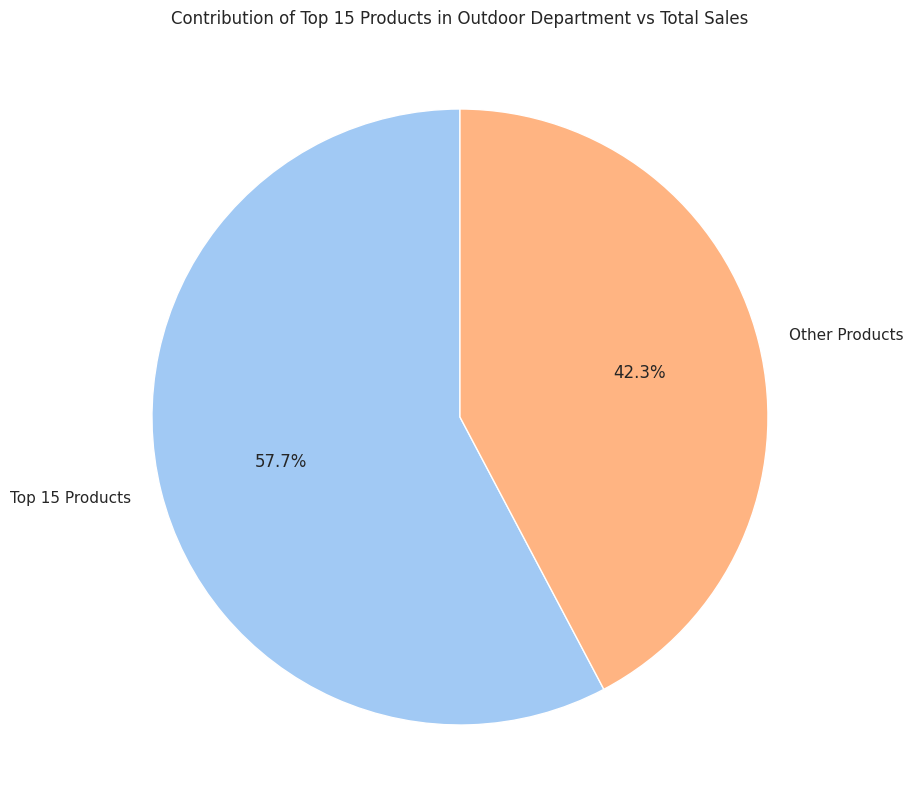

In [ ]:
df['order_year'] = df['order date (DateOrders)'].dt.year
outdoor_data = df[df['Department Name'] == 'Outdoors']
product_sales = outdoor_data.groupby('Product Name')['Sales'].sum().reset_index()
top_15_products = product_sales.sort_values(by='Sales', ascending=False).head(15)
total_sales_top_15 = top_15_products['Sales'].sum()
total_sales_outdoor = outdoor_data['Sales'].sum()
labels = ['Top 15 Products', 'Other Products']
sizes = [total_sales_top_15, total_sales_outdoor - total_sales_top_15]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Contribution of Top 15 Products in Outdoor Department vs Total Sales')
plt.show()

Reducing the sku's in outdoors as only top 15 products contribute to 57.7% percent of revenue. Evaluate the rest 38 products.

<Figure size 1200x800 with 0 Axes>

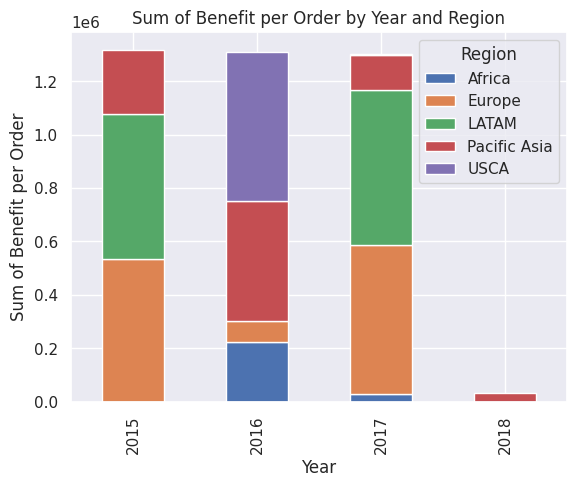

In [ ]:
grouped_by_year_region = df.groupby([df['order date (DateOrders)'].dt.to_period("Y"), 'Market'])['Benefit per order'].sum()

plt.figure(figsize=(12, 8))
grouped_by_year_region.unstack().plot(kind='bar', stacked=True)
plt.title('Sum of Benefit per Order by Year and Region')
plt.xlabel('Year')
plt.ylabel('Sum of Benefit per Order')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

In 2016, Latin America showed no sales activity, while US and Canada emerged as top sales markets despite not being present in 2015 or 2016 prior.

### Days of Shipment and Shipping Duration

In [ ]:
pd.crosstab(df["Days for shipping (real)"],df["Days for shipment (scheduled)"],normalize="columns")*100

Days for shipment (scheduled),0,1,2,4
Days for shipping (real),,,,
0,52.172127,0.0,0.000000,0.000000
1,47.827873,0.0,0.000000,0.000000
2,0.000000,100.0,20.269196,20.107283
3,0.000000,0.0,20.061904,20.138837
4,0.000000,0.0,19.814857,19.985708
5,0.000000,0.0,20.024989,19.592212
6,0.000000,0.0,19.829055,20.175960


INSIGHT
The pivot table analysis between scheduled and real delivery days reveals that the diagonal entries predominantly represent late deliveries.


### Percentage Increase in Quantity sold based on Discount

In [ ]:
def calculate_order_profit(df):
    product_analysis_1 = df.groupby(["Product Name", "Department Name"])["Benefit per order", "Sales per customer"].sum()
    product_analysis_1["Profit %"] = product_analysis_1["Benefit per order"] / product_analysis_1["Sales per customer"] * 100
    product_analysis_2 = df.groupby(["Product Name", "Department Name"])["Order Item Quantity"].sum().reset_index()
    product_analysis = pd.merge(product_analysis_1, product_analysis_2, on="Product Name")
    return product_analysis

def calculate_order_quantity(df, year_category):
    df = df[["Product Name", "Order Item Quantity"]]
    df.columns = ["Product Name", year_category]
    return df

def calculate_loss_products(df, year):
    products_loss = calculate_order_profit(df[(df["Benefit per order"] < 0) & (df["order year"] == year)])
    products_loss_quantity = calculate_order_quantity(products_loss, f"{year}_Loss_Quantity")
    discounted_products = products_loss["Product Name"].unique()
    products_discounted = calculate_order_profit(df[(df["Product Name"].isin(discounted_products)) & (df["order year"] == year)])
    products_discounted_quantity = calculate_order_quantity(products_discounted, f"{year}_Total_Quantity")
    new_df = pd.merge(products_loss_quantity, products_discounted_quantity, on="Product Name")
    new_df[f"% Discounted Products {year}"] = new_df[f"{year}_Loss_Quantity"] / new_df[f"{year}_Total_Quantity"]
    return new_df

def calculate_quantity_increase(df, year, difference):
    loss_products = calculate_loss_products(df, year)
    product_names_loss = loss_products["Product Name"].unique()
    products_discounted = calculate_order_profit(df[(df["Product Name"].isin(product_names_loss)) & (df["order year"] == year + difference)])
    products_discounted_quantity = calculate_order_quantity(products_discounted, f"{year + difference}_Total_Quantity")
    new_df = pd.merge(loss_products, products_discounted_quantity, on="Product Name")
    new_df["% Inc. in Quantity"] = new_df[f"{year + difference}_Total_Quantity"] / new_df[f"{year}_Total_Quantity"]
    return new_df

df['order date'] = pd.to_datetime(df['order date (DateOrders)'])
df['order month'] = df['order date'].dt.to_period('M')
df['order year'] = df['order date'].dt.year

calculate_quantity_increase(df, 2015, 2)


<ipython-input-37-6b661635b198>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_analysis_1 = df.groupby(["Product Name", "Department Name"])["Benefit per order", "Sales per customer"].sum()
<ipython-input-37-6b661635b198>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_analysis_1 = df.groupby(["Product Name", "Department Name"])["Benefit per order", "Sales per customer"].sum()
<ipython-input-37-6b661635b198>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_analysis_1 = df.groupby(["Product Name", "Department Name"])["Benefit per order", "Sales per customer"].sum()


,Product Name,2015_Loss_Quantity,2015_Total_Quantity,% Discounted Products 2015,2017_Total_Quantity,% Inc. in Quantity
0,Bag Boy Beverage Holder,73,396,0.184343,98,0.247475
1,Bridgestone e6 Straight Distance NFL Carolina,67,448,0.149554,80,0.178571
2,Bridgestone e6 Straight Distance NFL San Dieg,69,363,0.190083,119,0.327824
3,Bridgestone e6 Straight Distance NFL Tennesse,69,326,0.211656,117,0.358896
4,Clicgear 8.0 Shoe Brush,61,410,0.148780,121,0.295122
5,Clicgear Rovic Cooler Bag,53,370,0.143243,121,0.327027
6,Columbia Men's PFG Anchor Tough T-Shirt,92,393,0.234097,129,0.328244
7,Diamondback Women's Serene Classic Comfort Bi,918,4934,0.186056,3867,0.783745
8,ENO Atlas Hammock Straps,95,431,0.220418,146,0.338747
9,Field & Stream Sportsman 16 Gun Fire Safe,1153,6241,0.184746,4751,0.761256


INSIGHT

 DataCo's intentional selling of products at a loss, initially thought to be a promotional tactic, is revealed as a strategic inventory clearance. The significant drop in product sales from 2015 to 2017, coupled with department discontinuations, supports the conclusion that the company was systematically reducing inventory during this period.



## Business Insights

### Market Basket Analysis: Identifying Top Product Combinations

In [ ]:
duplicates_mask = df.duplicated(subset=['Order Id'], keep=False)
df["Same Order Map"] = duplicates_mask

def category_association(df, column):
    result_df = df.groupby('Order Id')[column].apply(lambda x: ', '.join(x)).reset_index()
    new_result_df = result_df.groupby(column).count().reset_index()
    filtered_df = result_df[result_df[column].str.count(',') > 1]

    def generate_combinations(categories, combinations_list, order_id):
        combinations_result = list(combinations(categories, 2))
        for combination in combinations_result:
            combinations_list.append([order_id, combination])
        return combinations_list

    combinations_list = []
    for i in range(len(filtered_df)):
        categories = filtered_df[column].iloc[i].split(",")
        generate_combinations(categories, combinations_list, filtered_df["Order Id"].iloc[i])

    new_df = pd.DataFrame(combinations_list)
    new_df.columns = ["Order Id", column]

    new_df[column] = new_df[column].astype(str)
    new_df[column] = new_df[column].apply(lambda x: x.replace('(', '').replace(')', '').replace('"', '').replace("'", ''))

    final_df = pd.concat([result_df, new_df])
    new_result_df = final_df.groupby(column).count().reset_index()

    return new_result_df

category_association(df[df["Same Order Map"]==True], "Product Name").sort_values(by="Order Id", ascending=False).head(10)


,Product Name,Order Id
13967,"Nike Mens CJ Elite 2 TD Football Cleat, Perfe...",3808
13956,"Nike Mens CJ Elite 2 TD Football Cleat, Nike ...",3638
13927,"Nike Mens CJ Elite 2 TD Football Cleat, Field...",2997
1319,"Perfect Fitness Perfect Rip Deck, OBrien Men...",2983
13963,"Nike Mens CJ Elite 2 TD Football Cleat, OBrie...",2833
926,"Nike Mens Dri-FIT Victory Golf Polo, OBrien ...",2825
1311,"Perfect Fitness Perfect Rip Deck, Nike Mens ...",2750
787,"Nike Mens CJ Elite 2 TD Football Cleat, Nike...",2692
1323,"Perfect Fitness Perfect Rip Deck, Perfect Fi...",2682
798,"Nike Mens CJ Elite 2 TD Football Cleat, Perf...",2651


INSIGHT

Through market basket analysis, we have identified a considerable number of top product combinations that are frequently purchased together, indicating strong patterns of consumer behavior.

ACTIONABLE SOLUTION:
To capitalize on these insights, the company should strategically group these frequently co-purchased products together in physical stores or on their website. This bundling can streamline the shopping experience for customers, making it easier for them to find complementary items and potentially increasing sales. Additionally, leveraging these product associations can enhance recommendation algorithms.

### Enhancing On-Time Delivery

In [ ]:
column_type1 = ["Order Id", "Delivery Status", "Days for shipping (real)", "Days for shipment (scheduled)",
                 "Late_delivery_risk", "Order City","Order Country","Order State", "Customer Fname", "Customer Id", "Customer Lname",
                 "Customer Segment", "Market", "order date (DateOrders)", "shipping date (DateOrders)",
                 "Shipping Mode", "Type", "order date","order month","order year","Customer Country","Customer State"]

column_type2 = ["Benefit per order", "Sales per customer", "Order Item Discount", "Order Item Quantity", "Sales"]

OrderGroup_df = df.groupby(column_type1)[column_type2].sum().reset_index()
OrderGroup_df

Customer_States_Optimized_columns = ['Advance shipping', 'Late delivery', 'Shipping canceled',"Shipping on time",'Total Orders',"Customer State"]
Customer_States_Optimized = pd.DataFrame(columns=Customer_States_Optimized_columns)
Customer_States=OrderGroup_df["Customer State"].unique()
Customer_States=Customer_States[0:-3]

for state in Customer_States:
  cross_tab_normalized=pd.crosstab(OrderGroup_df["Order Country"],OrderGroup_df[OrderGroup_df["Customer State"]==state]["Delivery Status"])
  mean=cross_tab_normalized["Late delivery"].mean()
  cross_tab_normalized=cross_tab_normalized[cross_tab_normalized["Late delivery"]>mean]
  cross_tab_normalized["Total Orders"]=cross_tab_normalized.sum(axis=1)
  cross_tab_normalized["Customer State"]=state
  for column in cross_tab_normalized.columns[0:-2]:
    cross_tab_normalized[column]=cross_tab_normalized[column]/cross_tab_normalized["Total Orders"]
  Customer_States_Optimized=Customer_States_Optimized.append(cross_tab_normalized.sort_values(by="Late delivery").head(5), ignore_index=False)

  Customer_States_Optimized=Customer_States_Optimized[(Customer_States_Optimized["Late delivery"]<0.5)&(Customer_States_Optimized["Total Orders"]>25)].sort_values(by="Late delivery")

  Customer_States_Optimized = Customer_States_Optimized.sort_values(by='Late delivery').groupby(level=0).first()

  cross_tab_normalized=pd.crosstab(OrderGroup_df["Order Country"],OrderGroup_df["Delivery Status"])
mean=cross_tab_normalized["Late delivery"].mean()
cross_tab_normalized=cross_tab_normalized[cross_tab_normalized["Late delivery"]>mean]
cross_tab_normalized["Total Orders"]=cross_tab_normalized.sum(axis=1)

for column in cross_tab_normalized.columns[0:-1]:
  cross_tab_normalized[column]=cross_tab_normalized[column]/cross_tab_normalized["Total Orders"]
cross_tab_normalized.sort_values(by="Late delivery")
cross_tab_normalized = cross_tab_normalized[cross_tab_normalized.index.isin(Customer_States_Optimized.index)]

final_df=cross_tab_normalized.iloc[:,:4]-Customer_States_Optimized.iloc[:,:4]
final_df["Customer State"]=Customer_States_Optimized["Customer State"]

<ipython-input-39-e27e9ed39a1f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Customer_States_Optimized=Customer_States_Optimized.append(cross_tab_normalized.sort_values(by="Late delivery").head(5), ignore_index=False)
<ipython-input-39-e27e9ed39a1f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Customer_States_Optimized=Customer_States_Optimized.append(cross_tab_normalized.sort_values(by="Late delivery").head(5), ignore_index=False)
<ipython-input-39-e27e9ed39a1f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Customer_States_Optimized=Customer_States_Optimized.append(cross_tab_normalized.sort_values(by="Late delivery").head(5), ignore_index=False)
<ipython-input-39-e27e9ed39a1f>:24: FutureWarning: The frame.app

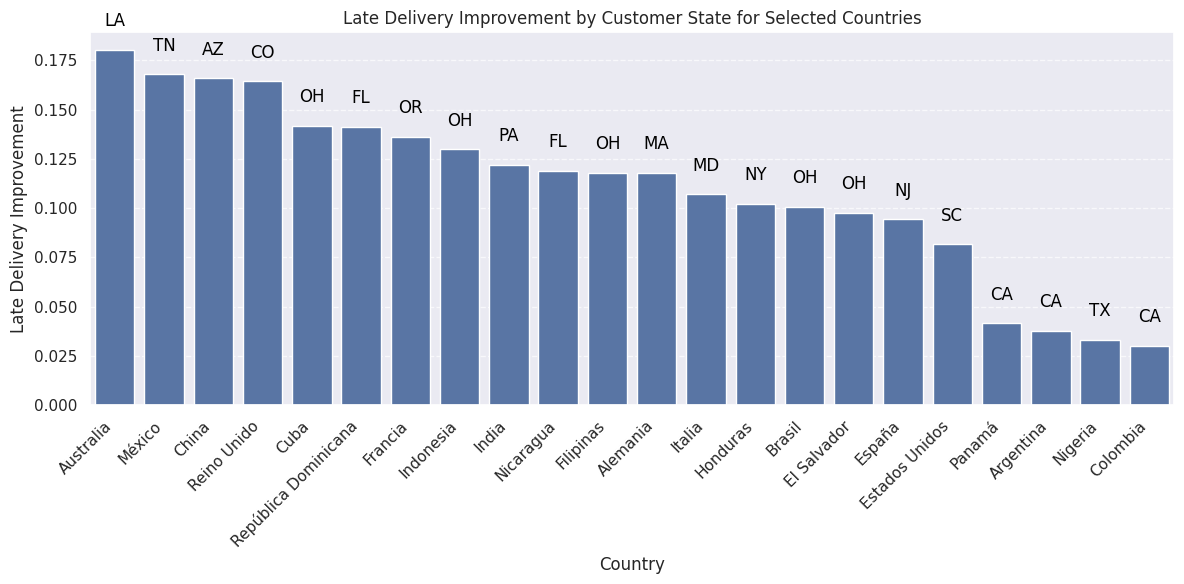

In [ ]:
final_df_sorted = final_df.sort_values(by='Late delivery', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=final_df_sorted.index, y='Late delivery', data=final_df_sorted)

for i, (index, row) in enumerate(final_df_sorted.iterrows()):
    plt.text(i, row['Late delivery'] + 0.01, row['Customer State'],
             ha='center', va='bottom', color='black')

plt.xlabel('Country')
plt.ylabel('Late Delivery Improvement')
plt.title('Late Delivery Improvement by Customer State for Selected Countries')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


ACTIONABLE SOLUTION:

DataCo has a significant opportunity to enhance its delivery performance by strategically optimizing delivery routes. Analysis of the first bar reveals that by routing deliveries to Australia from Los Angeles (LA), DataCo could potentially achieve a remarkable 17.5% reduction in the Late Delivery%.

### Average Profit by Different Countries of Shipment


In [ ]:
df['Benefit per order'] = pd.to_numeric(df['Benefit per order'], errors='coerce')
average_benefit_per_order_id_country_region = df.groupby(['Order Id', 'Customer Country', 'Order Region'])['Benefit per order'].mean().reset_index()
overall_avg_benefit_per_order_country_region = average_benefit_per_order_id_country_region.groupby(['Customer Country', 'Order Region']).agg({'Benefit per order': 'mean', 'Order Id': 'nunique'}).reset_index()

overall_avg_benefit_per_order_country_region
pivot_table = overall_avg_benefit_per_order_country_region.pivot(index='Order Region', columns='Customer Country', values=['Benefit per order', 'Order Id'])
abs_diff_pivot_table = pivot_table.diff(axis=1).abs().sum(axis=1)
sorted_pivot_table = pivot_table.loc[abs_diff_pivot_table.sort_values(ascending=False).index]
sorted_pivot_table

Benefit per order             Order Id            
Customer Country           EE. UU. Puerto Rico  EE. UU. Puerto Rico
Order Region                                                       
Western Europe           25.713551   25.259952   6054.0      3956.0
Central America          21.388379   22.483531   5772.0      3624.0
South America            21.632865   23.251966   3059.0      1920.0
Southeast Asia           24.314621   25.533300   2721.0      1635.0
Oceania                  20.571376   19.957991   2714.0      1648.0
Northern Europe          28.248281   24.927609   2285.0      1431.0
Southern Europe          25.593885   27.832178   2196.0      1347.0
Eastern Asia             23.162904   20.457025   2041.0      1277.0
South Asia               21.776782   23.844696   2024.0      1311.0
West of USA              20.026129   19.995930   1661.0      1006.0
Caribbean                23.925849   19.323774   1693.0      1113.0
East of USA              22.764770   21.519507   1451.0       872.0
US Center                23.417313   25.900859   1200.0       735.0
West Asia                20.398565   21.027258   1220.0       802.0
South of  USA            21.511980   23.407369    836.0       509.0
West Africa              20.061204   24.539842    779.0       444.0
Eastern Europe           20.345429   23.175012    789.0       503.0
North Africa             20.072596   18.676589    681.0       383.0
East Africa              23.836701   25.435541    383.0       230.0
Central Africa           19.637143   19.162577    332.0       224.0
Southern Africa          28.121749   24.883586    251.0       147.0
Canada                   25.907678   26.183895    177.0       132.0
Central Asia             26.429695   19.658527    121.0        63.0

INSIGHT:
Our analysis indicates that orders are being shipped from two distinct countries, and we have computed the average profits associated with each country of shipment. ACTIONABLE SOLUTION:
Leveraging this insight, the company can optimize its shipping strategies by potentially focusing more resources on the country yielding higher average profits per shipment.


### Number of Repeat Customers After Suspected Fraud

In [ ]:
filtered_df = df[(df['Type'] == 'TRANSFER') & (df['Order Status'] == 'SUSPECTED_FRAUD')]
customer_order_ids = filtered_df.groupby('Customer Id')['Order Id'].unique()

count = 0
fraud_customer = []
for customer_id, order_ids in customer_order_ids.items():
    if len(order_ids) > 1:
      count+=1
      fraud_customer.append(customer_id)
fraudulent_customers_df = filtered_df[filtered_df['Customer Id'].isin(fraud_customer)]
fraudulent_customers_df = filtered_df[filtered_df['Customer Id'].isin(fraud_customer)]
fraudulent_customers_df[['Customer Id', 'Order Status']]

,Customer Id,Order Status
Order Item Id,,
101052,2784,SUSPECTED_FRAUD
81596,3800,SUSPECTED_FRAUD
81595,3800,SUSPECTED_FRAUD
94445,3222,SUSPECTED_FRAUD
131310,9002,SUSPECTED_FRAUD
...,...,...
72257,9231,SUSPECTED_FRAUD
71017,6637,SUSPECTED_FRAUD
70939,482,SUSPECTED_FRAUD


BUSINESS INSIGHT:
There are 349 customer IDs that have been involved in repeated instances of fraud. As a proactive business action, these customer IDs should be immediately flagged and blocked to mitigate further fraudulent activities.

### Late Delivery Risk vs. Order Month

<ipython-input-46-f464cbe78739>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp, x="order month only", y="Late_delivery_risk", palette="viridis")


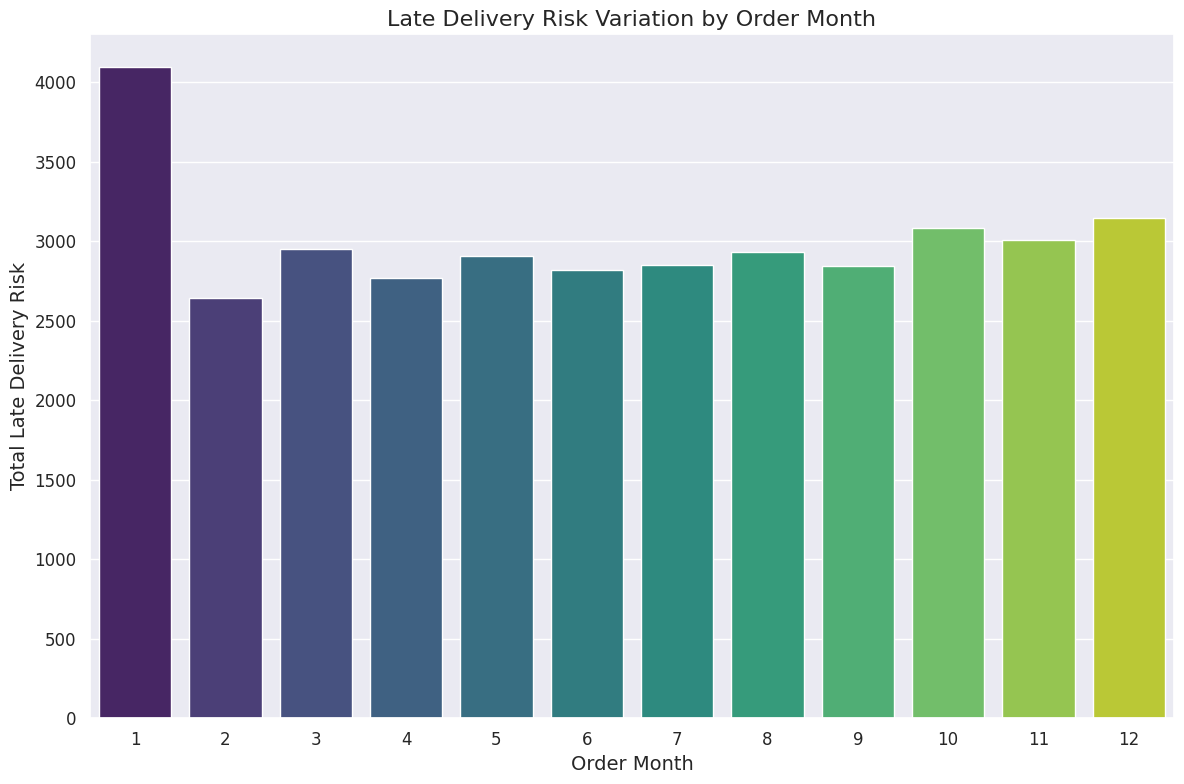

In [ ]:
df['order month only'] = df['order date (DateOrders)'].dt.month

column_type1 = ["Order Id", "Delivery Status", "Days for shipping (real)", "Days for shipment (scheduled)",
                "Late_delivery_risk", "Order City","Order Country","Order State", "Customer Fname",
                "Customer Id", "Customer Lname", "Customer Segment", "Market", "order date (DateOrders)",
                "shipping date (DateOrders)", "Shipping Mode", "Type", "order date","order month",
                "order year","Customer Country","Customer State","order month only"]

column_type2 = ["Benefit per order", "Sales per customer", "Order Item Discount", "Order Item Quantity", "Sales"]

OrderGroup_df = df.groupby(column_type1)[column_type2].sum().reset_index()

temp = OrderGroup_df.groupby(["order month only"])["Late_delivery_risk"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=temp, x="order month only", y="Late_delivery_risk", palette="viridis")
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Total Late Delivery Risk', fontsize=14)
plt.title('Late Delivery Risk Variation by Order Month', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

INSIGHT
The analysis highlights a notable surge in late orders during January.
ACTIONABLE SOLUTION:
To address the issue, the company should consider augmenting its delivery staff to accommodate the increased demand during peak periods like January.

### Understanding Late Deliveries: Exploring the Distribution of Number of Items in Orders with Late Delivery

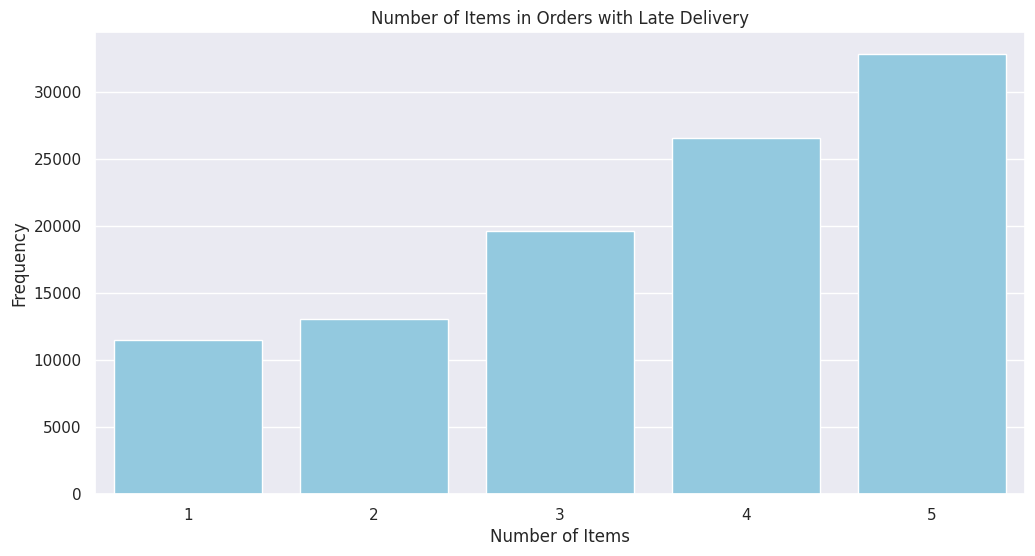

In [ ]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])
late_deliveries = df[df['Days for shipment (scheduled)'] < df['Days for shipping (real)']]
items_per_order = df.groupby('Order Id')['Product Name'].count().reset_index(name='Number of Items')
late_deliveries_items = pd.merge(late_deliveries, items_per_order, on='Order Id', how='left')
items_frequency = late_deliveries_items['Number of Items'].value_counts().reset_index()
items_frequency.columns = ['Number of Items', 'Frequency']
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Items', y='Frequency', data=items_frequency, color='skyblue')
plt.title('Number of Items in Orders with Late Delivery')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

INSIGHT: Analysis indicates a correlation between the number of items in orders and late deliveries, suggesting that larger orders tend to experience more delays.

ACTION: To mitigate late deliveries, the company could provide customers with the option to have each product delivered individually rather than bundled together in a single order. This personalized delivery approach may reduce the complexity of orders, streamline the delivery process, and ultimately decrease the occurrence of late deliveries.